<div style="text-align: center; padding: 10px; background-color: #8ef14e; border-bottom: 15px solid #008cba;border-radius: 15px 50px; ">
    <h1 style="font-size: 3em; color: #008cba;">🌐 Anemia_Prediction 🌐</h1>
    <h2 style="font-size: 2em; color: #333;">✨ Created By Abdulrahman Mohammed ✨</h2>
</div>

<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);border-radius: 15px 50px 30px 5px;">Import Libs & Load dataset</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('diabetes_dataset.csv')

In [3]:
df

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0


In [4]:
df.columns

Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [5]:
df=df.drop(['year', 'gender', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other','hypertension',
       'heart_disease', 'smoking_history'],axis=1)

In [6]:
df.columns

Index(['age', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'diabetes'], dtype='object')

In [7]:
df

,age,bmi,hbA1c_level,blood_glucose_level,diabetes
0,32.0,27.32,5.0,100,0
1,29.0,19.95,5.0,90,0
2,18.0,23.76,4.8,160,0
3,41.0,27.32,4.0,159,0
4,52.0,23.75,6.5,90,0
...,...,...,...,...,...
99995,33.0,21.21,6.5,90,0
99996,80.0,36.66,5.7,100,0
99997,46.0,36.12,6.2,158,0
99998,51.0,29.29,6.0,155,0


<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);border-radius: 15px 50px 30px 5px;"> Data Preprocessing </p>

In [8]:
df.describe()

,age,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060,0.085000
std,22.516840,6.636783,1.070672,40.708136,0.278883
min,0.080000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
# check duplicated values
df.duplicated().sum()

14084

In [10]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [11]:
df.isnull().sum()

age                    0
bmi                    0
hbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   bmi                  100000 non-null  float64
 2   hbA1c_level          100000 non-null  float64
 3   blood_glucose_level  100000 non-null  int64  
 4   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 3.8 MB


In [13]:
df.shape

(100000, 5)

<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);border-radius: 15px 50px 30px 5px;"> Data Visualization </p>

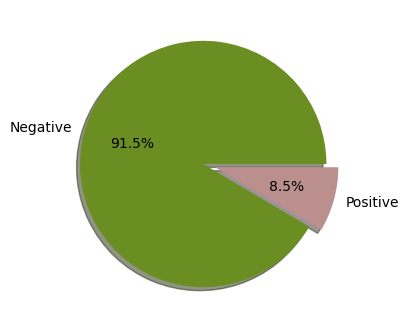

In [14]:
fig = plt.figure(figsize =(15, 4))

plt.pie(df.groupby('diabetes').size(), labels =['Negative', 'Positive'], explode=(0, 0.1), autopct='%1.1f%%', shadow=True,colors=['olivedrab', 'rosybrown'])

plt.show()

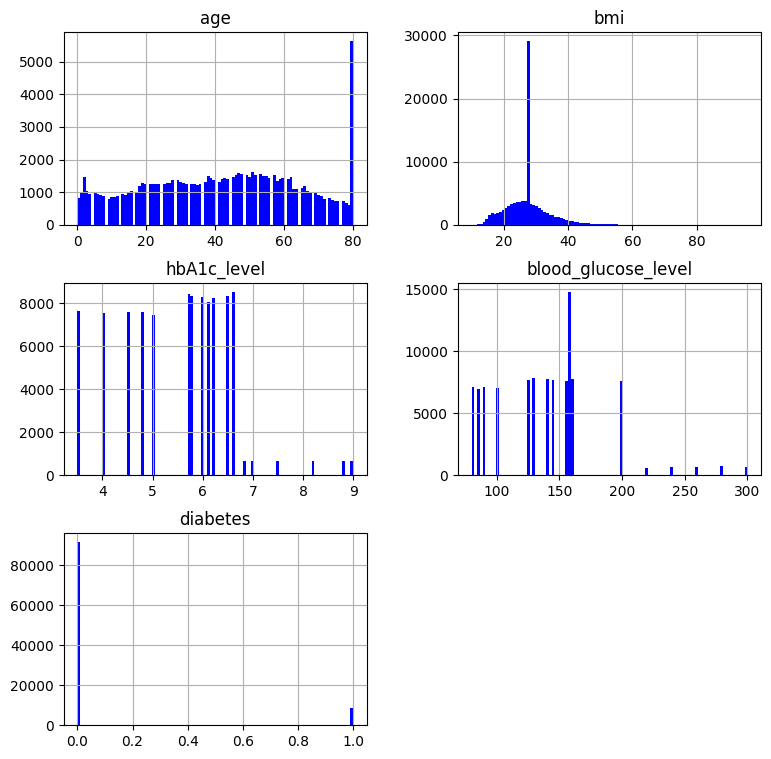

In [15]:
df.hist(bins=100, figsize=(9,9), color='b')
plt.show()

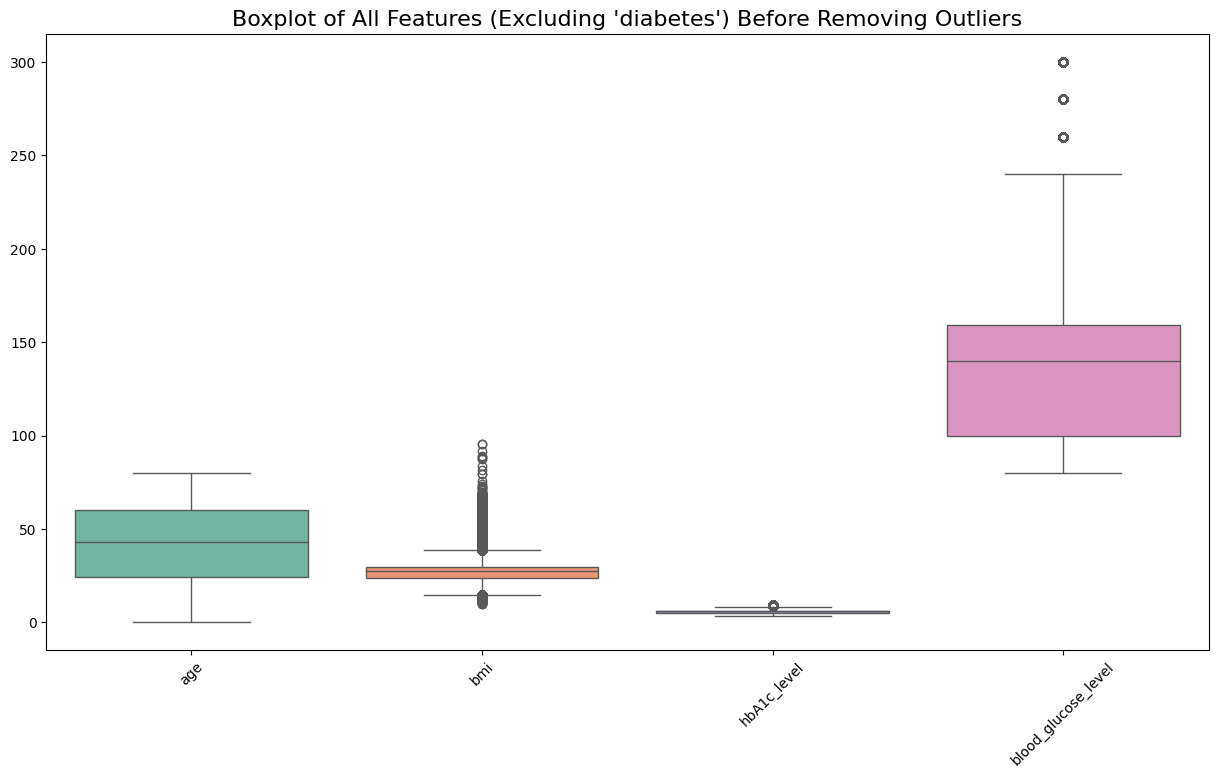

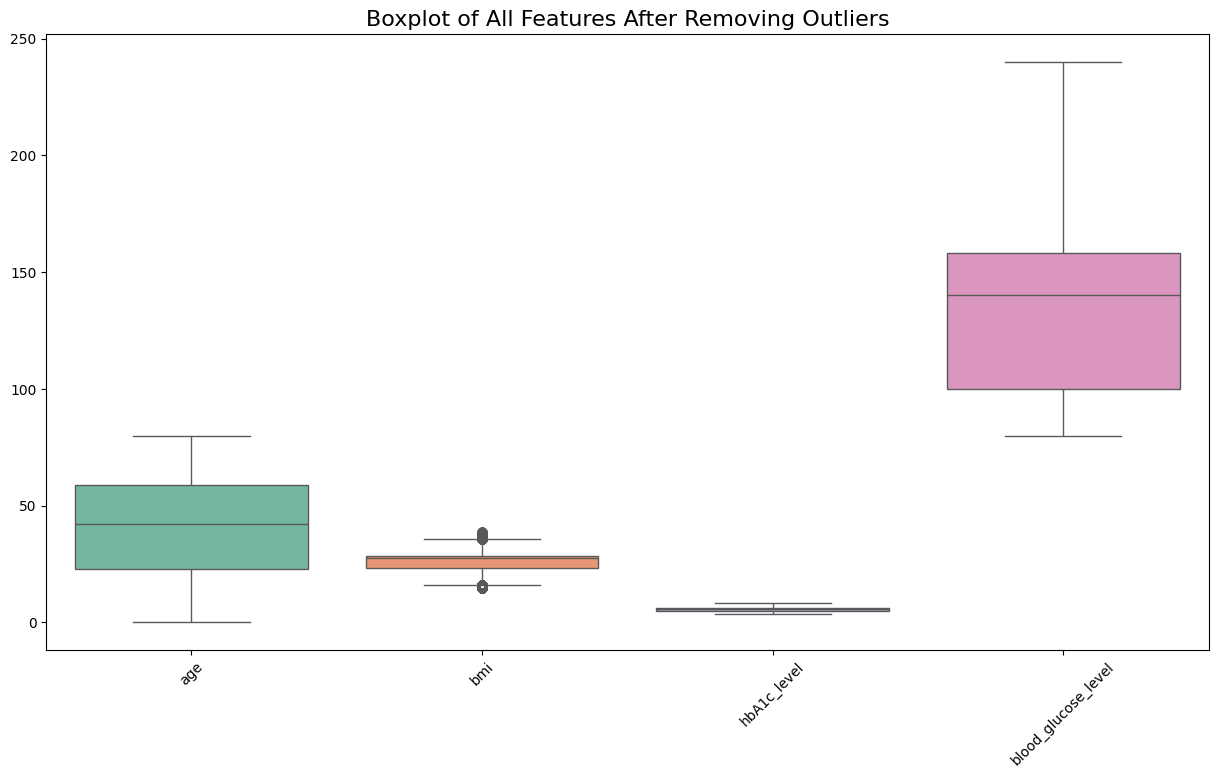

In [16]:
# Exclude the 'diabetes' column
df_without_diabetes = df.drop('diabetes', axis=1)

# Calculate Q1, Q3, and IQR for each column
Q1 = df_without_diabetes.quantile(0.25)
Q3 = df_without_diabetes.quantile(0.75)
IQR = Q3 - Q1

# Plot the boxplot before removing outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_without_diabetes, palette="Set2")
plt.title("Boxplot of All Features (Excluding 'diabetes') Before Removing Outliers", fontsize=16)
plt.xticks(rotation=45)
plt.show()

# Remove outliers based on the 1.5*IQR rule
df_without_outliers = df_without_diabetes[~((df_without_diabetes < (Q1 - 1.5 * IQR)) | (df_without_diabetes > (Q3 + 1.5 * IQR))).any(axis=1)]

# Plot the boxplot again after removing outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_without_outliers, palette="Set2")
plt.title("Boxplot of All Features After Removing Outliers", fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [17]:
# update df with outliers removed
df = df.loc[df_without_outliers.index]
df.shape

(90387, 5)

In [18]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

Missing values in each column:
 Series([], dtype: int64)


In [19]:
df.columns

Index(['age', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'diabetes'], dtype='object')

([<matplotlib.patches.Wedge at 0x29fea000ce0>,
 [Text(-1.0866024233904008, 0.17115832869629316, 'Negative'),
  Text(1.1853844640656646, -0.1867181628866294, 'Positive')],
 [Text(-0.5926922309402185, 0.09335908837979627, '95.0%'),
  Text(0.6914742707049708, -0.10891892835053381, '5.0%')])

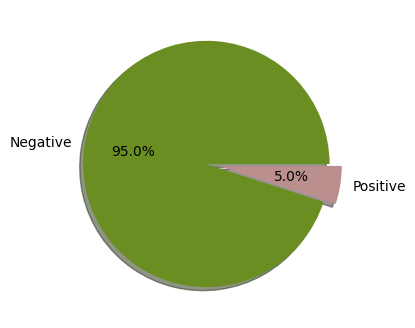

In [20]:
# plotting pie with diabetes values
fig = plt.figure(figsize =(15, 4))
plt.pie(df.groupby('diabetes').size(), labels =['Negative', 'Positive'], explode=(0, 0.1), autopct='%1.1f%%', shadow=True,colors=['olivedrab', 'rosybrown'])


<Axes: >

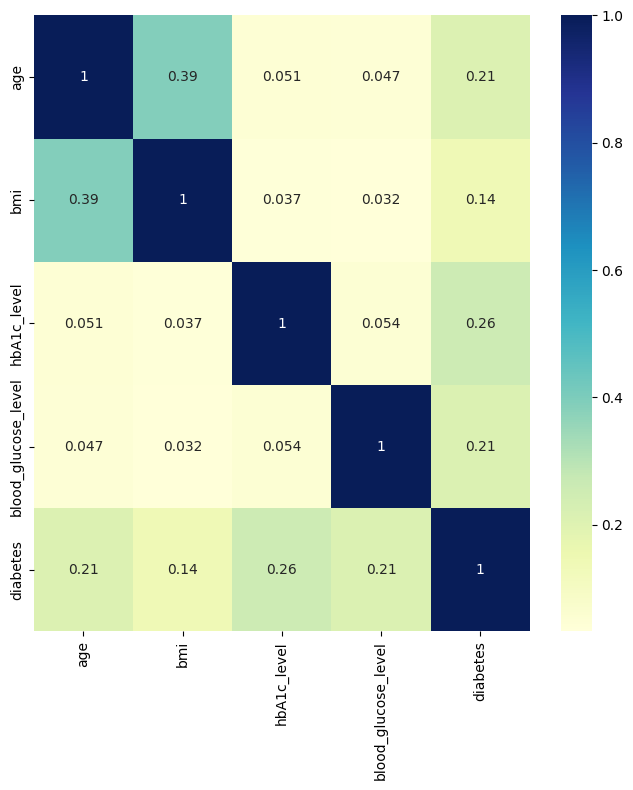

In [21]:
correlation=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation ,annot=True ,cbar=True ,cmap='YlGnBu')

<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);border-radius: 15px 50px 30px 5px;"> Data Seprating Shapes</p>

In [22]:
X= df.drop('diabetes', axis=1)
y= df['diabetes']

In [23]:
X.head()

,age,bmi,hbA1c_level,blood_glucose_level
0,32.0,27.32,5.0,100
1,29.0,19.95,5.0,90
2,18.0,23.76,4.8,160
3,41.0,27.32,4.0,159
4,52.0,23.75,6.5,90


In [24]:
y.shape

(90387,)

<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);border-radius: 15px 50px 30px 5px;"> Data Standardization </p>

In [25]:
scaler= StandardScaler()
X=scaler.fit_transform(X)

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
# use smote to balance the dataset
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)


C:\Users\HP Elite BOOK\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


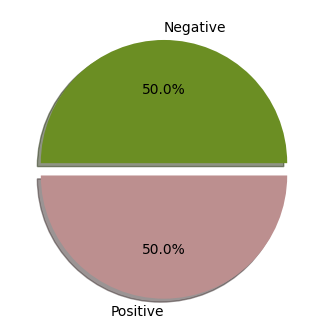

In [28]:
# plotting pie with diabetes values after smote
fig = plt.figure(figsize =(15, 4))
plt.pie(Y_train.value_counts(), labels =['Negative', 'Positive'], explode=(0, 0.1), autopct='%1.1f%%', shadow=True,colors=['olivedrab', 'rosybrown'])
plt.show()

In [29]:
X_train.shape

(137432, 4)

<a id="Import"></a>
<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);border-radius: 15px 50px 30px 5px;"> ML Algorithms </p>

### Logistic Regression

In [30]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
print('accuracy score on the training data : ',model1.score(X_train, Y_train))
print('accuracy score on the testing data : ',model1.score(X_test, Y_test))

accuracy score on the training data :  0.8518540078002212
accuracy score on the testing data :  0.8360438101559907


### RandomForestClassifier

In [31]:
model2 = RandomForestClassifier()
model2.fit(X_train, Y_train)
print('accuracy score on the training data : ',model2.score(X_train, Y_train))
print('accuracy score on the testing data : ',model2.score(X_test, Y_test))

accuracy score on the training data :  0.9971258513301123
accuracy score on the testing data :  0.9596194269277575


### DecisionTreeClassifier

In [32]:
model3 = tree.DecisionTreeClassifier()
model3.fit(X_train, Y_train)
print('accuracy score on the training data : ',model3.score(X_train, Y_train))
print('accuracy score on the testing data : ',model3.score(X_test, Y_test))

accuracy score on the training data :  0.9971258513301123
accuracy score on the testing data :  0.9496072574399823


### KNeighborsClassifier

In [33]:
model4 =KNeighborsClassifier()
model4.fit(X_train, Y_train)
print('accuracy score on the training data : ',model4.score(X_train, Y_train))
print('accuracy score on the testing data : ',model4.score(X_test, Y_test))

accuracy score on the training data :  0.9622213167239071
accuracy score on the testing data :  0.9043035734041376


<p style="background-color: #008080; font-family: 'Arial', sans-serif; color: #FFFFFF; font-size:160%; text-align:center; padding: 15px 25px; margin-top: 25px; border: 4px solid #20B2AA; border-left: 15px solid #FF6347; border-right: none; border-top: none; border-bottom: none; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.2);border-radius: 15px 50px 30px 5px;"> System Evaluation </p>

In [34]:
# print random sample with diabetes value = 0 and 1
df[df['diabetes'] == 0].sample(1)

,age,bmi,hbA1c_level,blood_glucose_level,diabetes
82297,58.0,34.42,6.2,155,0


In [35]:
df[df['diabetes'] == 1].sample(1)

,age,bmi,hbA1c_level,blood_glucose_level,diabetes
37661,53.0,27.32,7.0,159,1


In [36]:
input_data=(69.0	,27.72	,6.6	,159)
input_data_arr=np.asarray(input_data)
input_data_arr_reshape=input_data_arr.reshape(1,-1)


input_data_arr_scaler=scaler.transform(input_data_arr_reshape)
print(input_data_arr_scaler)


predict_input=model2.predict(input_data_arr_scaler)
print(predict_input)


if predict_input==1:
    print("Positive +")
else:
    print("Negative -")


[[1.22312881 0.28742707 1.14958006 0.69400663]]
[1]
Positive +


C:\Users\HP Elite BOOK\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Saving Model

In [37]:
import joblib

joblib.dump(model2, 'diabetes.pkl')
print("Model saved!")

joblib.dump(scaler, 'scalerdiabetes.pkl')
print("Scaler saved!")

loaded_model = joblib.load('diabetes.pkl')

new_predictions = loaded_model.predict(X_test)
print(f"Restored Model Accuracy: {accuracy_score(Y_test, new_predictions):.2f}")

Model saved!
Scaler saved!
Restored Model Accuracy: 0.96


In [38]:
loaded_model = joblib.load('diabetes.pkl')

In [39]:
loaded_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
Y_test.iloc[12]

0

In [41]:
X_test[12]

array([ 0.60252524, -0.96901573,  1.14958006, -0.24355496])

In [42]:
loaded_model.predict(X_test[12].reshape(1, -1))

array([0], dtype=int64)

In [43]:
from joblib import dump

# Save the model
dump(model2, 'diabetesmodel2.joblib')

# Save the scaler
dump(scaler, 'diabetesscaler2.joblib')

['diabetesscaler2.joblib']